In [1]:
import sys

sys.path.append("..")

In [2]:
import os

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from utils.preprocessing_utils import (
    ORIGINAL_IMG_DIR,
    TRAIN_IMG_DIR,
    TEST_IMG_DIR,
    VAL_IMG_DIR,
)

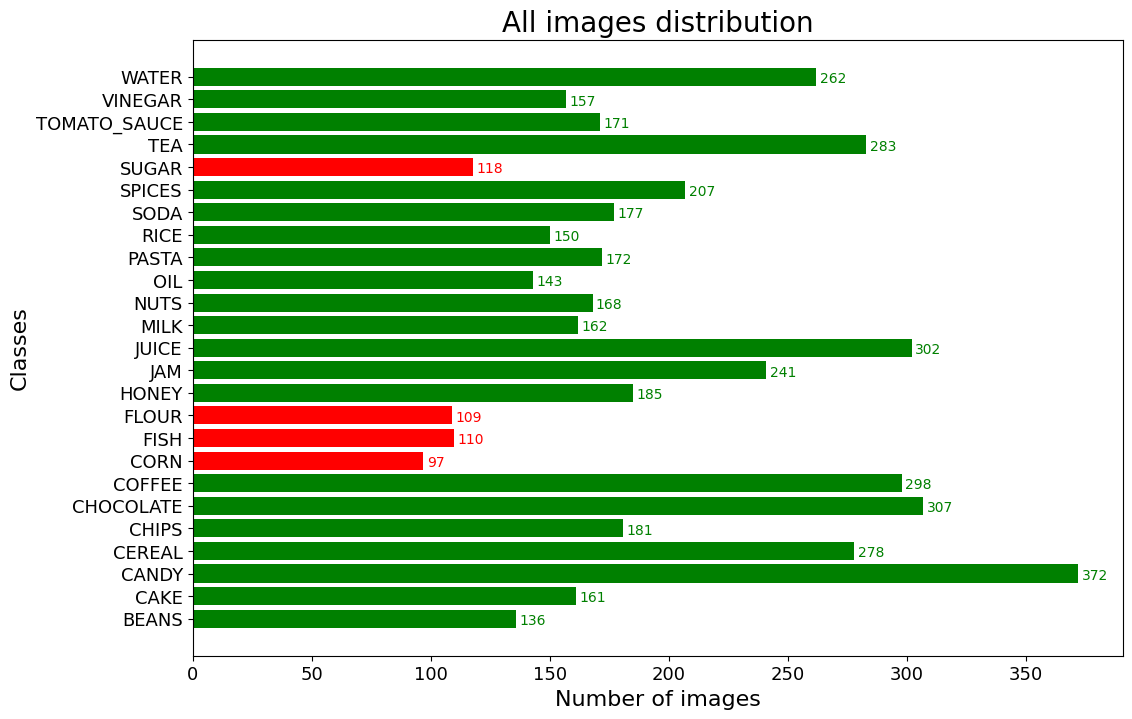

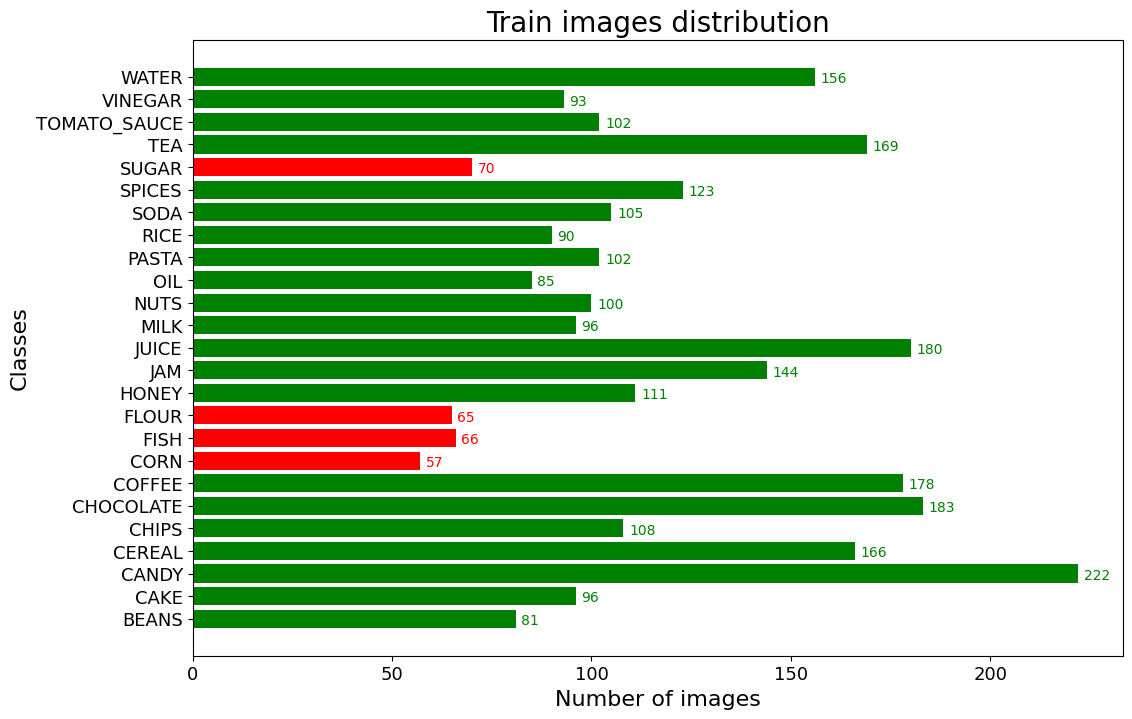

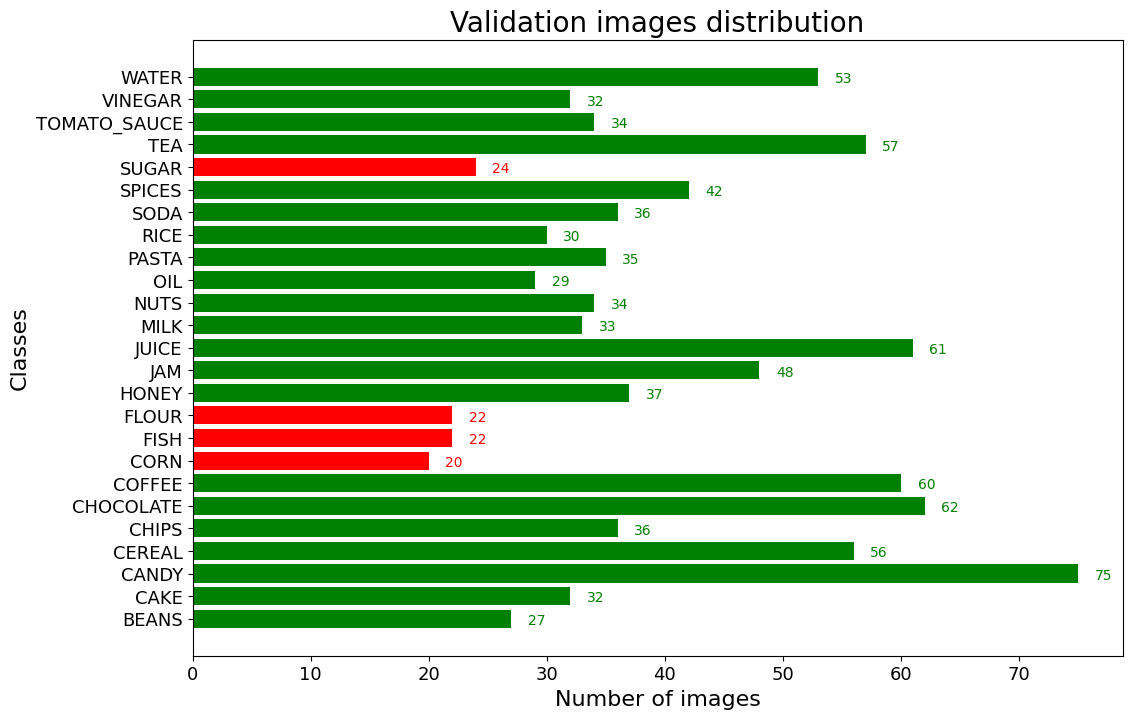

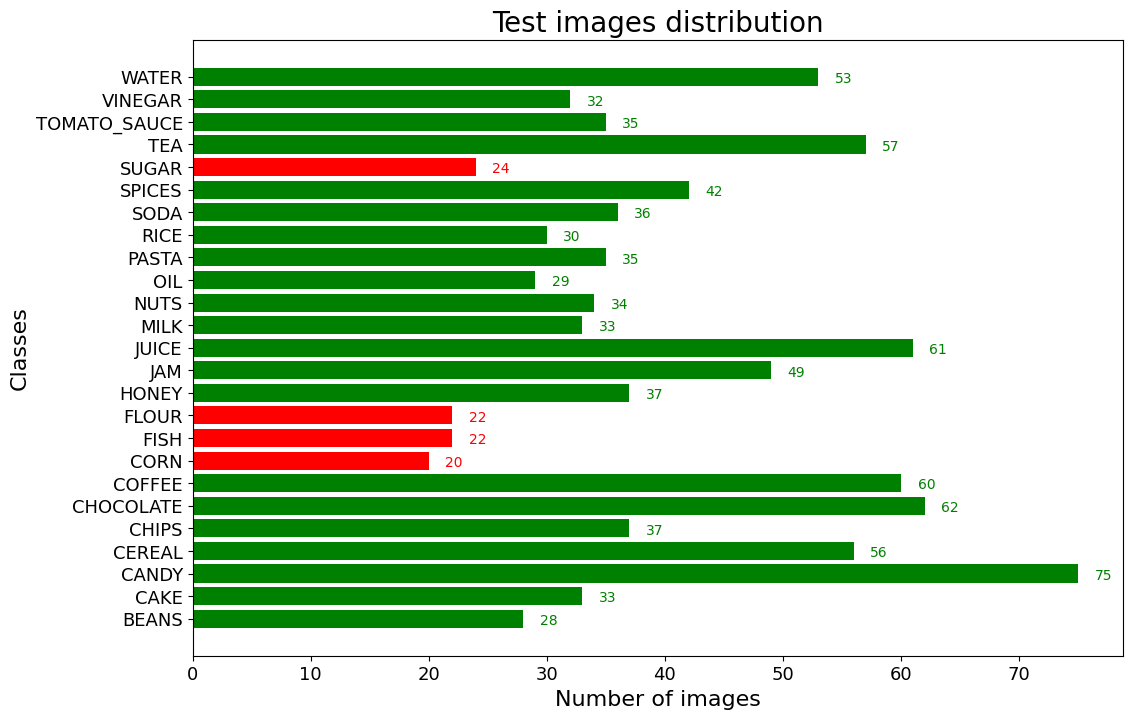

In [18]:
def plot_class_distribution(data: dict[str, int], title: str):
    keys = data.keys()
    values = list(data.values())
    data_size = sum(values)

    colors = ["red" if x <= data_size * 0.025 else "green" for x in values]

    fig, ax = plt.subplots(figsize=(12, 8))
    y_pos = np.arange(len(values))
    plt.barh(y_pos, values, align="center", color=colors)
    for i, v in enumerate(values):
        ax.text(v + 1.4, i - 0.25, str(v), color=colors[i])
    ax.set_yticks(y_pos)
    ax.set_yticklabels(keys)
    ax.set_xlabel("Number of images", fontsize=16)
    ax.set_ylabel("Classes", fontsize=16)
    plt.title(f"{title} images distribution", fontsize=20)
    plt.xticks(color="black", fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()


def class_distribution():
    for DIR, name in zip(
        [ORIGINAL_IMG_DIR, TRAIN_IMG_DIR, VAL_IMG_DIR, TEST_IMG_DIR], ["All", "Train", "Validation", "Test"]
    ):
        data = {i: len(os.listdir(os.path.join(DIR, i))) for i in os.listdir(DIR)}

        plot_class_distribution(data, name)


class_distribution()

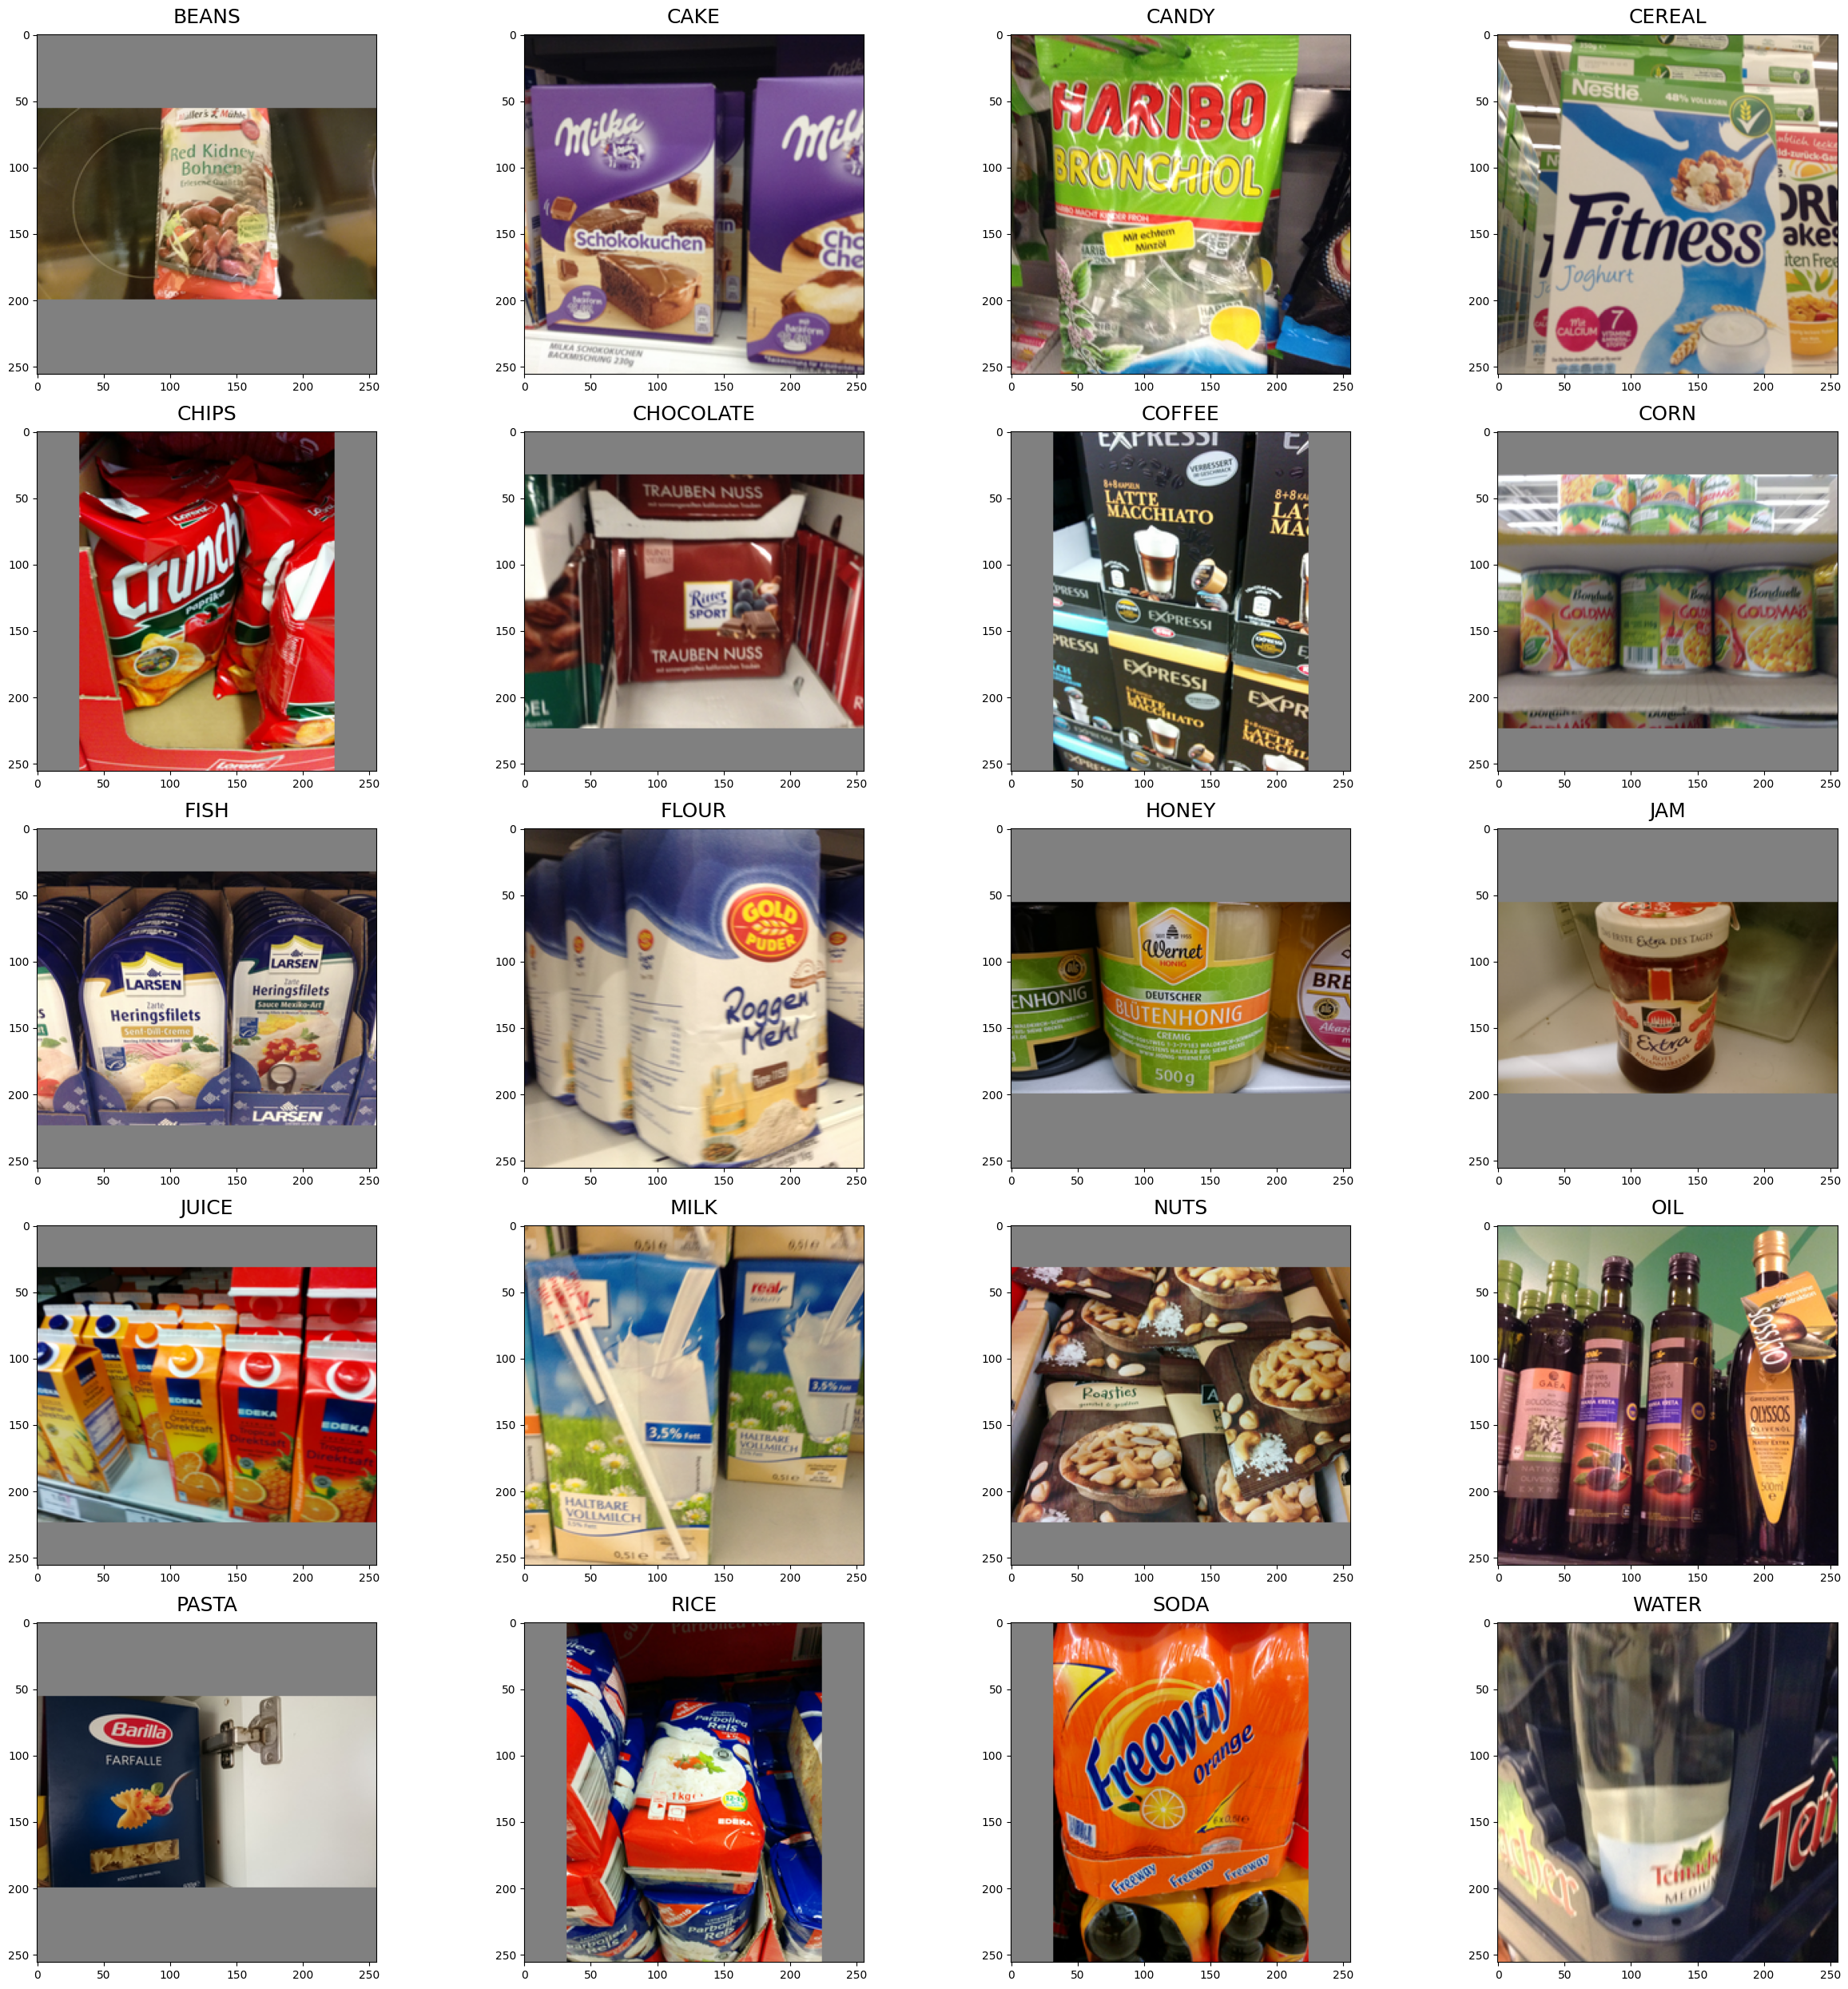

In [20]:
def plot_sample_images():
    images = []

    for food_folder in sorted(os.listdir(ORIGINAL_IMG_DIR)):
        food_items = os.listdir(ORIGINAL_IMG_DIR + "/" + food_folder)
        food_selected = np.random.choice(food_items)
        images.append(os.path.join(ORIGINAL_IMG_DIR, food_folder, food_selected))

    fig = plt.figure(1, figsize=(25, 25))

    for subplot, image_ in enumerate(images):
        category = os.path.normpath(image_).split(os.sep)[-2]
        imgs = plt.imread(image_)
        a, b, c = imgs.shape
        fig = plt.subplot(5, 4, min(subplot + 1, 20))
        fig.set_title(category, pad=10, size=18)
        plt.imshow(imgs)

    plt.tight_layout()


plot_sample_images()